<a href="https://colab.research.google.com/github/tegiri-adeleke1/waste-bin/blob/master/smart_bin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai import *
from fastai.vision import *
from fastai.core import *

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

bs = 64  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/colab/'

In [11]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  6 classes:
 ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


In [0]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

In [13]:
data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 2022 training images and 505 validation images.


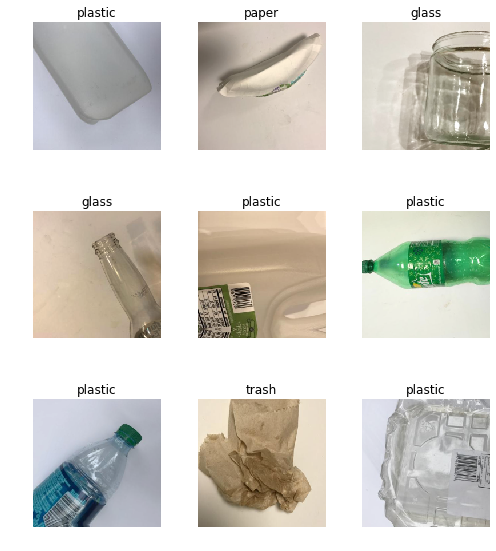

In [14]:
data.show_batch(rows=3, figsize=(7,8))

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 47939151.26it/s]


In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.409527,0.571240,0.223762,00:27
1,0.892600,0.434715,0.150495,00:27
2,0.653420,0.399945,0.148515,00:27
3,0.525234,0.395099,0.146535,00:27
4,0.441858,0.377775,0.148515,00:27


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [18]:
interp.most_confused()

[('plastic', 'glass', 12),
 ('glass', 'metal', 10),
 ('cardboard', 'paper', 8),
 ('glass', 'plastic', 8),
 ('trash', 'paper', 5),
 ('metal', 'glass', 3),
 ('metal', 'paper', 3),
 ('paper', 'trash', 3),
 ('plastic', 'metal', 3),
 ('trash', 'metal', 3),
 ('cardboard', 'metal', 2),
 ('paper', 'plastic', 2),
 ('plastic', 'paper', 2),
 ('trash', 'glass', 2),
 ('cardboard', 'plastic', 1),
 ('cardboard', 'trash', 1),
 ('glass', 'paper', 1),
 ('metal', 'plastic', 1),
 ('metal', 'trash', 1),
 ('paper', 'cardboard', 1),
 ('paper', 'metal', 1),
 ('plastic', 'trash', 1),
 ('trash', 'plastic', 1)]

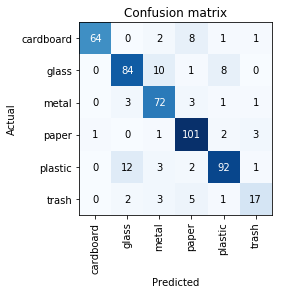

In [19]:
interp.plot_confusion_matrix()

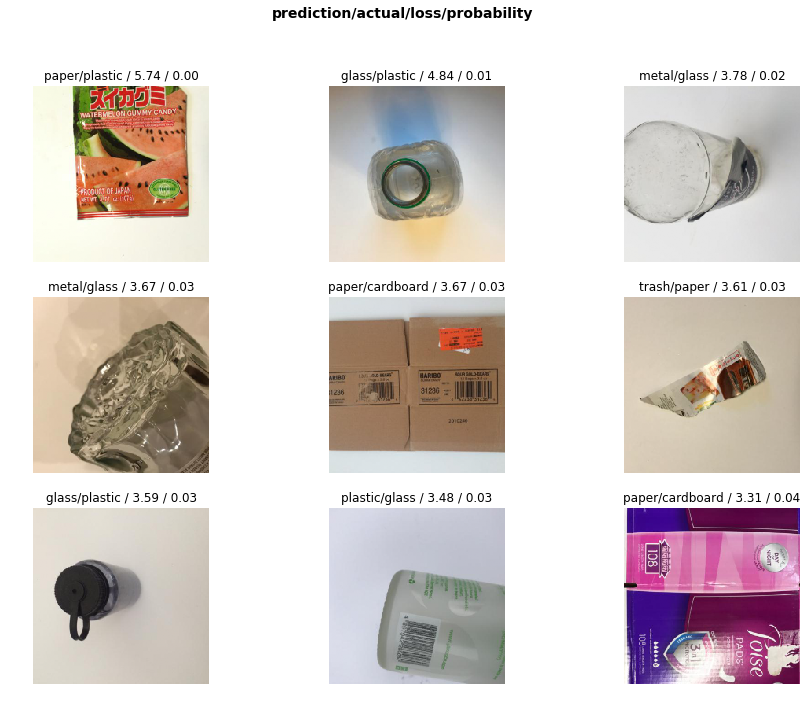

In [20]:
interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

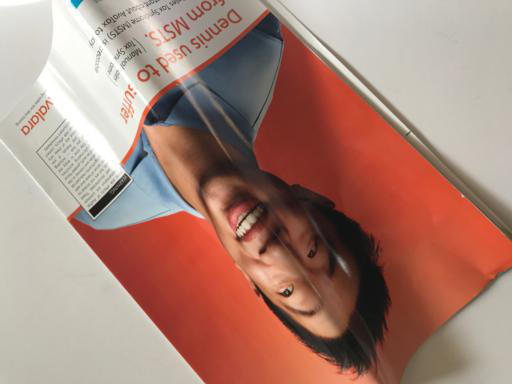

In [28]:
filename = '/content/drive/My Drive/test image/paper9.jpg'
img = open_image(filename)
img

In [29]:
pred_class,pred_idx,outputs = learn.predict(img)
print( pred_class)

paper
